In [1]:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv(r"C:\Users\sandr\OneDrive\Documents\bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


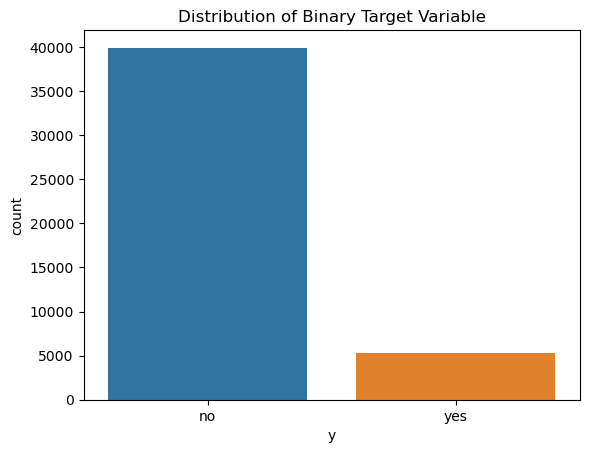

In [4]:
#univariate analysis
sns.countplot(x='y', data=df)
plt.title('Distribution of Binary Target Variable')
plt.show()


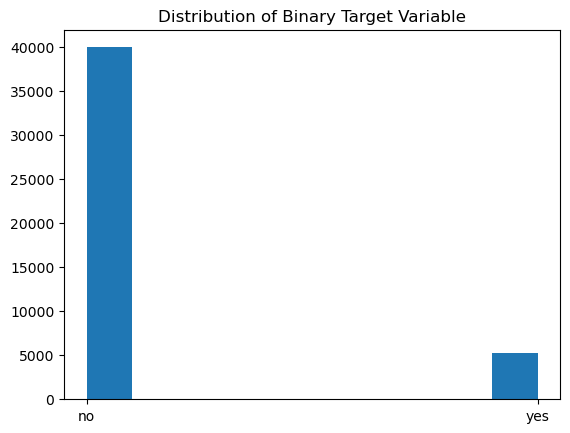

In [5]:
plt.hist(x='y', data=df)
plt.title('Distribution of Binary Target Variable')
plt.show()


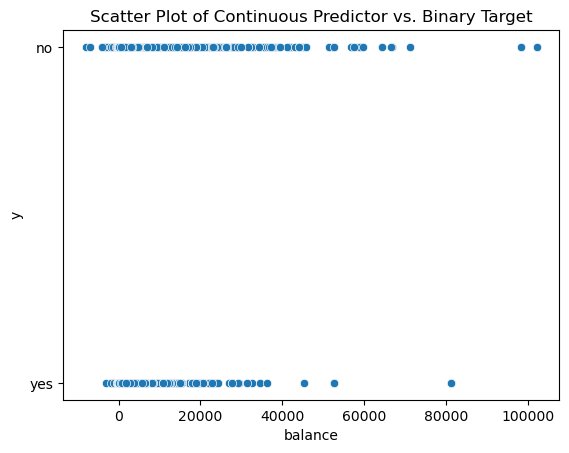

In [6]:
#Bivariate analysis
sns.scatterplot(x='balance', y='y', data=df)
plt.title('Scatter Plot of Continuous Predictor vs Binary Target')
plt.show()


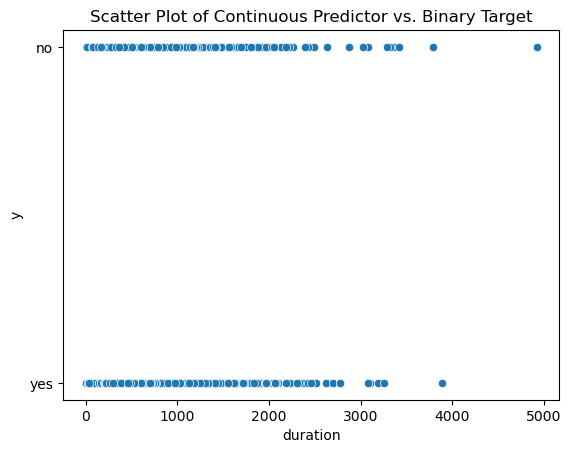

In [7]:
sns.scatterplot(x='duration', y='y', data=df)
plt.title('Scatter Plot of Continuous Predictor vs. Binary Target')
plt.show()


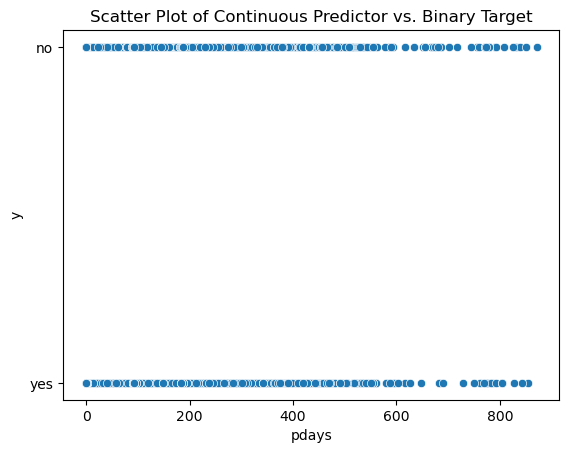

In [8]:
sns.scatterplot(x='pdays', y='y', data=df)
plt.title('Scatter Plot of Continuous Predictor vs. Binary Target')
plt.show()


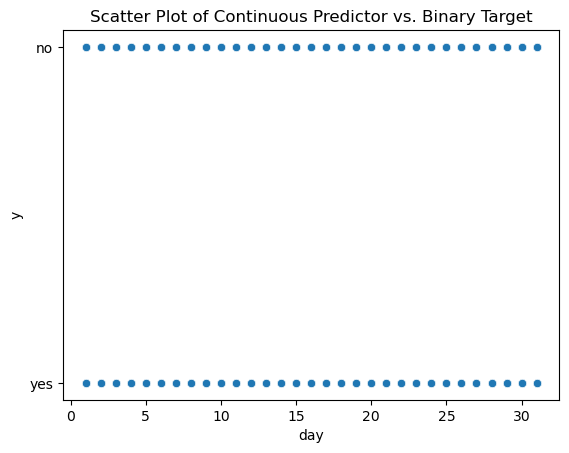

In [9]:
sns.scatterplot(x='day', y='y', data=df)
plt.title('Scatter Plot of Continuous Predictor vs. Binary Target')
plt.show()


In [10]:
#df_index=df.drop(['job','marital','contact','month','education','loan','poutcome','housing','default'],axis=1)
#df_index

In [11]:
df1=pd.get_dummies(df, columns=['job','marital','contact','month','education','loan','poutcome','housing','default'], drop_first=True)
df1

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_sep,education_secondary,education_tertiary,education_unknown,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,default_yes
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,True,False,False,False,False,True,True,False
1,44,29,5,151,1,-1,0,no,False,False,...,False,True,False,False,False,False,False,True,True,False
2,33,2,5,76,1,-1,0,no,False,True,...,False,True,False,False,True,False,False,True,True,False
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,True,True,False
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,False,False,...,False,False,True,False,False,False,False,True,False,False
45207,71,1729,17,456,2,-1,0,yes,False,False,...,False,False,False,False,False,False,False,True,False,False
45208,72,5715,17,1127,5,184,3,yes,False,False,...,False,True,False,False,False,False,True,False,False,False
45209,57,668,17,508,4,-1,0,no,True,False,...,False,True,False,False,False,False,False,True,False,False


In [12]:
df1.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
education_secondary    0
education_tertiary     0
education_unknown      0
loan_yes               0
poutcome_other         0
poutcome_success       0


In [13]:
df1.dtypes

age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
y                      object
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
job_unknown              bool
marital_married          bool
marital_single           bool
contact_telephone        bool
contact_unknown          bool
month_aug                bool
month_dec                bool
month_feb                bool
month_jan                bool
month_jul                bool
month_jun                bool
month_mar                bool
month_may                bool
month_nov                bool
month_oct                bool
month_sep 

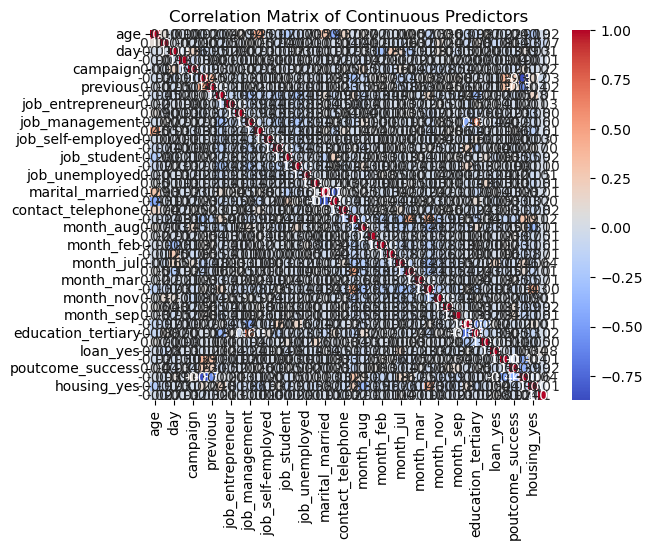

In [14]:
X = df1.drop(['y'], axis=1)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Predictors')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


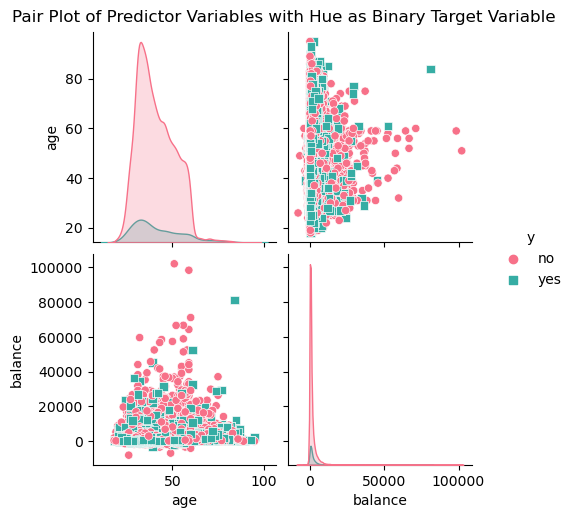

In [15]:
ct1=['age','balance','y']
sns.pairplot(df[ct1], hue='y', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Predictor Variables with Hue as Binary Target Variable', y=1.02)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


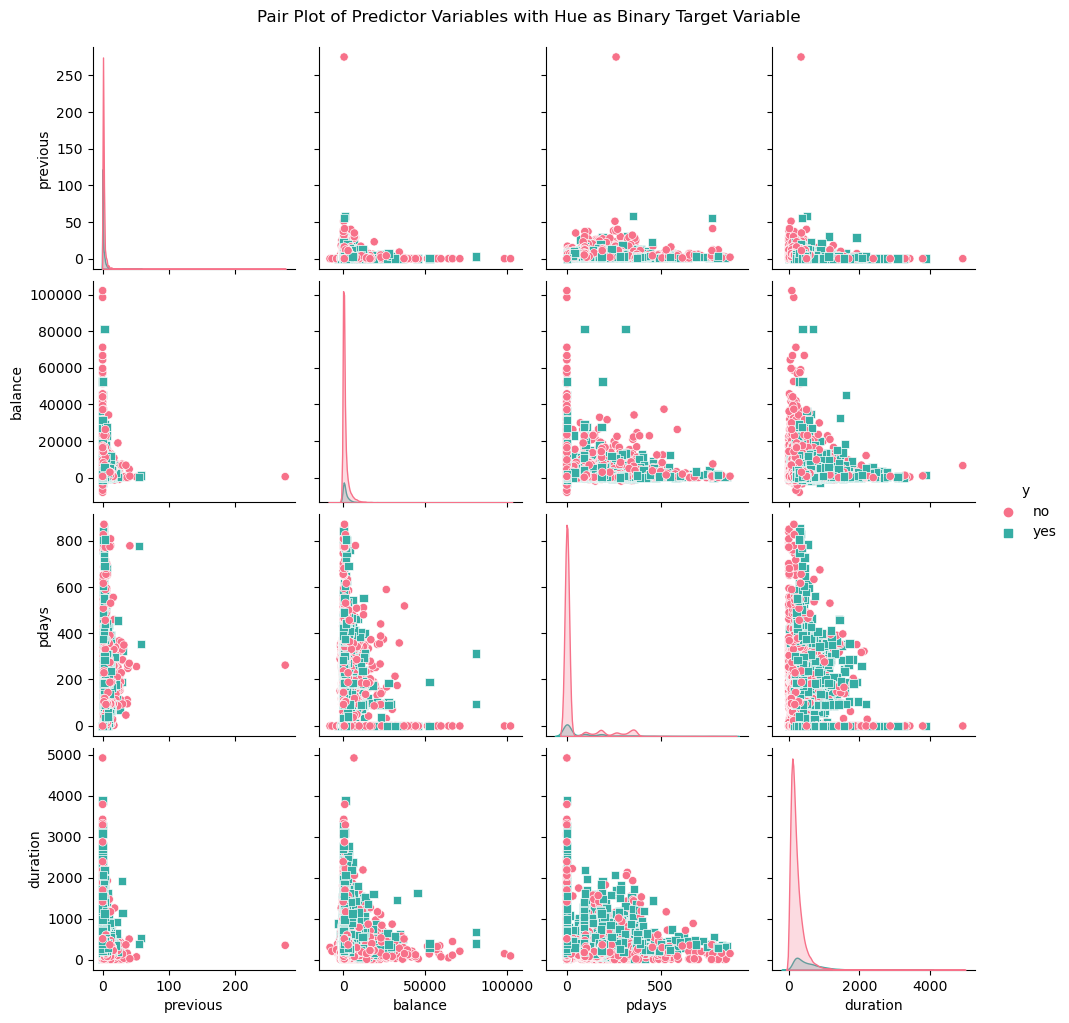

In [16]:
ct2=['previous','balance','pdays','duration','y']
sns.pairplot(df[ct2], hue='y', markers=["o", "s"], palette="husl")
plt.suptitle('Pair Plot of Predictor Variables with Hue as Binary Target Variable', y=1.02)
plt.show()

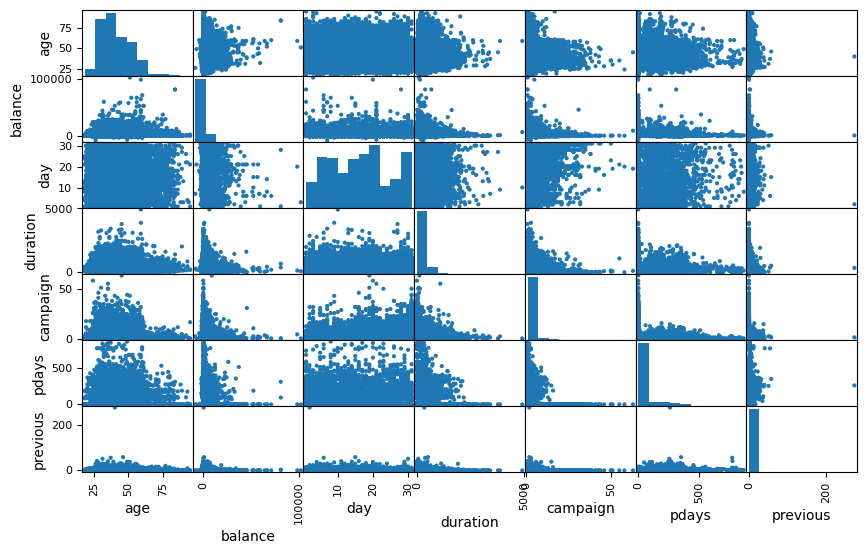

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

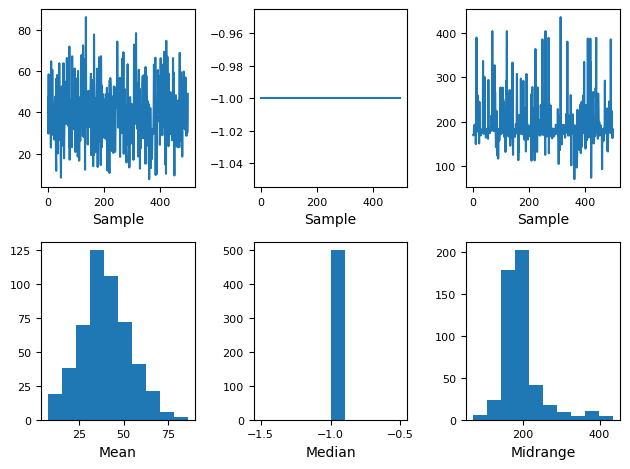

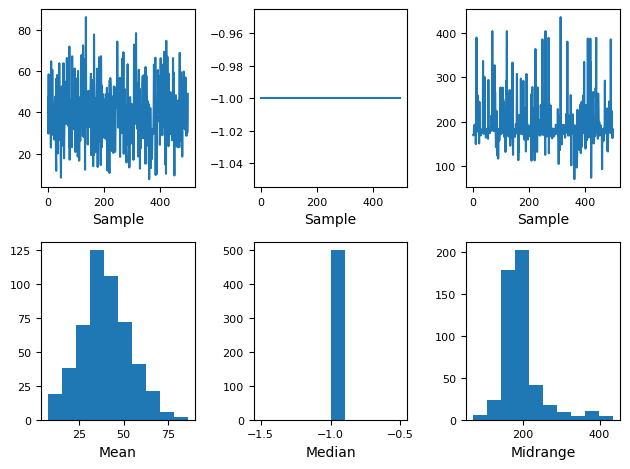

In [19]:
pd.plotting.bootstrap_plot(df['pdays'])

In [17]:
X = df1.drop(['y'], axis=1)
y = df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.8987061815769103
Confusion Matrix:
[[7755  197]
 [ 719  372]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

